In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
matches = pd.read_csv('/content/drive/MyDrive/Cricket_Project/odi_Matches_Data.csv')

In [27]:
matches.head()  # Display the first 5 rows of the dataset
matches.info()  # Get information about the dataset
matches.describe()  # Get statistical summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4745 entries, 0 to 4744
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ODI Match No           4745 non-null   int64  
 1   Match ID               4745 non-null   int64  
 2   Match Name             4744 non-null   object 
 3   Series ID              4744 non-null   float64
 4   Series Name            4745 non-null   object 
 5   Match Date             4744 non-null   object 
 6   Match Format           4744 non-null   object 
 7   Team1 ID               4744 non-null   float64
 8   Team1 Name             4744 non-null   object 
 9   Team1 Captain          4744 non-null   float64
 10  Team1 Runs Scored      4739 non-null   float64
 11  Team1 Wickets Fell     4739 non-null   float64
 12  Team1 Extras Rec       4739 non-null   float64
 13  Team2 ID               4744 non-null   float64
 14  Team2 Name             4744 non-null   object 
 15  Team

,ODI Match No,Match ID,Series ID,Team1 ID,Team1 Captain,Team1 Runs Scored,Team1 Wickets Fell,Team1 Extras Rec,Team2 ID,Team2 Captain,Team2 Runs Scored,Team2 Wickets Fell,Team2 Extras Rec,MOM Player
count,4745.000000,4.745000e+03,4.744000e+03,4744.000000,4744.000000,4739.000000,4739.000000,4739.000000,4744.000000,4744.000000,4644.000000,4644.000000,4644.000000,4426.000000
mean,2373.000000,4.348431e+05,4.235612e+05,12.444772,18903.544477,233.968981,7.768939,15.014138,15.110455,19153.449831,200.654608,6.678079,13.398148,23062.537054
std,1369.907844,4.581586e+05,4.511839e+05,118.296532,23880.102760,64.926722,2.097355,7.062796,156.162965,24221.015944,58.704728,3.150395,6.900743,27250.814991
min,1.000000,6.414800e+04,6.078300e+04,1.000000,858.000000,1.000000,0.000000,0.000000,1.000000,858.000000,4.000000,0.000000,0.000000,1060.000000
25%,1187.000000,6.533400e+04,6.100200e+04,3.000000,1903.000000,195.000000,6.000000,10.000000,3.000000,1873.000000,163.000000,4.000000,8.000000,1988.000000
50%,2373.000000,2.399020e+05,2.249020e+05,6.000000,2281.000000,236.000000,8.000000,14.000000,6.000000,2297.500000,203.000000,7.000000,12.500000,7023.000000
75%,3559.000000,7.300870e+05,7.300730e+05,8.000000,45853.000000,276.500000,10.000000,19.000000,9.000000,45788.000000,240.000000,10.000000,18.000000,48469.000000
max,4745.000000,1.421073e+06,1.420525e+06,4083.000000,108314.000000,498.000000,10.000000,59.000000,4083.000000,108314.000000,438.000000,10.000000,44.000000,110059.000000


In [28]:
matches_clean = matches.dropna()

In [29]:
matches['Team1 Runs Scored'] = matches['Team1 Runs Scored'].fillna(0)
matches['Team1 Wickets Fell'] = matches['Team1 Wickets Fell'].fillna(matches['Team1 Wickets Fell'].mean())

In [30]:
matches['Match Name'] = matches['Match Name'].fillna('Unknown')
matches['Series ID'] = matches['Series ID'].fillna(matches['Series ID'].mode()[0])  # Fill with most frequent value

In [31]:
# Handling missing values for numerical columns
matches['Team1 Runs Scored'] = matches['Team1 Runs Scored'].fillna(0)
matches['Team1 Wickets Fell'] = matches['Team1 Wickets Fell'].fillna(matches['Team1 Wickets Fell'].mean())
matches['Team2 Runs Scored'] = matches['Team2 Runs Scored'].fillna(0)
matches['Team2 Wickets Fell'] = matches['Team2 Wickets Fell'].fillna(matches['Team2 Wickets Fell'].mean())

# Handling missing values for categorical columns
matches['Match Name'] = matches['Match Name'].fillna('Unknown')
matches['Series ID'] = matches['Series ID'].fillna(matches['Series ID'].mode()[0])
matches['Match Date'] = matches['Match Date'].fillna('Unknown')
matches['Match Format'] = matches['Match Format'].fillna('Unknown')
matches['Match Winner'] = matches['Match Winner'].fillna('Unknown')  # Can also choose to fill with 'Draw' or similar if appropriate

# Check if missing values are handled
matches.isnull().sum()

,0
ODI Match No,0
Match ID,0
Match Name,0
Series ID,0
Series Name,0
Match Date,0
Match Format,0
Team1 ID,1
Team1 Name,1
Team1 Captain,1


In [32]:
team_matches = matches.groupby('Team1 Name')['Match ID'].count().sort_values(ascending=False)
print(team_matches.head())

Team1 Name
Australia      553
Pakistan       510
India          498
Sri Lanka      470
New Zealand    414
Name: Match ID, dtype: int64


In [33]:
match_winners = matches['Match Winner'].value_counts()
print(match_winners.head())

Match Winner
Australia      608
India          559
Pakistan       512
Sri Lanka      421
West Indies    420
Name: count, dtype: int64


In [34]:
team_wins = matches.groupby('Match Winner')['Match ID'].count()
print(team_wins)

Match Winner
Afghanistan      79
Africa XI         1
Asia XI           4
Australia       608
Bangladesh      159
Bermuda           7
Canada           24
England         400
Hong Kong         9
ICC World XI      1
India           559
Ireland          80
Jersey            1
Kenya            42
Namibia          26
Nepal            34
Netherlands      43
New Zealand     379
Oman             23
P.N.G.           14
Pakistan        512
Scotland         69
South Africa    410
Sri Lanka       421
U.A.E.           37
U.S.A.           22
Unknown         210
West Indies     420
Zimbabwe        151
Name: Match ID, dtype: int64


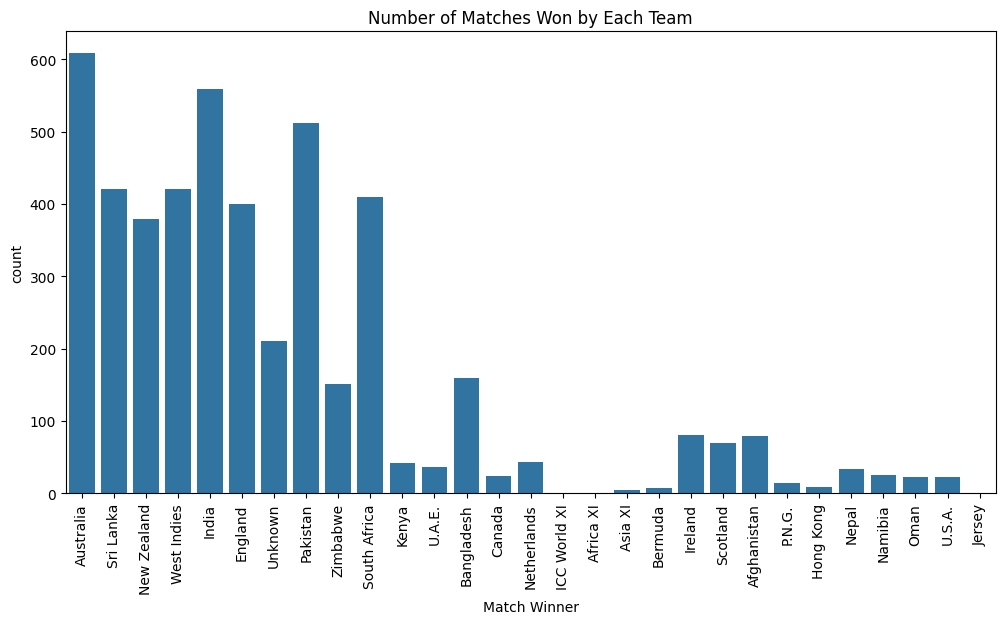

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(data=matches, x='Match Winner')
plt.title('Number of Matches Won by Each Team')
plt.xticks(rotation=90)
plt.show()

In [37]:
# Total runs scored by Team1 and Team2
team1_runs = matches.groupby('Team1 Name')['Team1 Runs Scored'].sum()
team2_runs = matches.groupby('Team2 Name')['Team2 Runs Scored'].sum()

# Combine both series into one dataframe for easier comparison
total_runs = pd.DataFrame({
    'Team1 Runs': team1_runs,
    'Team2 Runs': team2_runs
})

# Add total runs scored by both teams
total_runs['Total Runs'] = total_runs['Team1 Runs'] + total_runs['Team2 Runs']

# Sort by total runs scored
total_runs = total_runs.sort_values(by='Total Runs', ascending=False)

# Display the top 10 teams with the most total runs
print(total_runs.head(10))


              Team1 Runs  Team2 Runs  Total Runs
India           122113.0    114990.0    237103.0
Australia       139199.0     88226.0    227425.0
Pakistan        118523.0     94255.0    212778.0
Sri Lanka       110454.0     86226.0    196680.0
West Indies      90353.0     92075.0    182428.0
England          93991.0     82072.0    176063.0
New Zealand      95748.0     78833.0    174581.0
South Africa     85185.0     68961.0    154146.0
Zimbabwe         60800.0     54888.0    115688.0
Bangladesh       48101.0     41414.0     89515.0


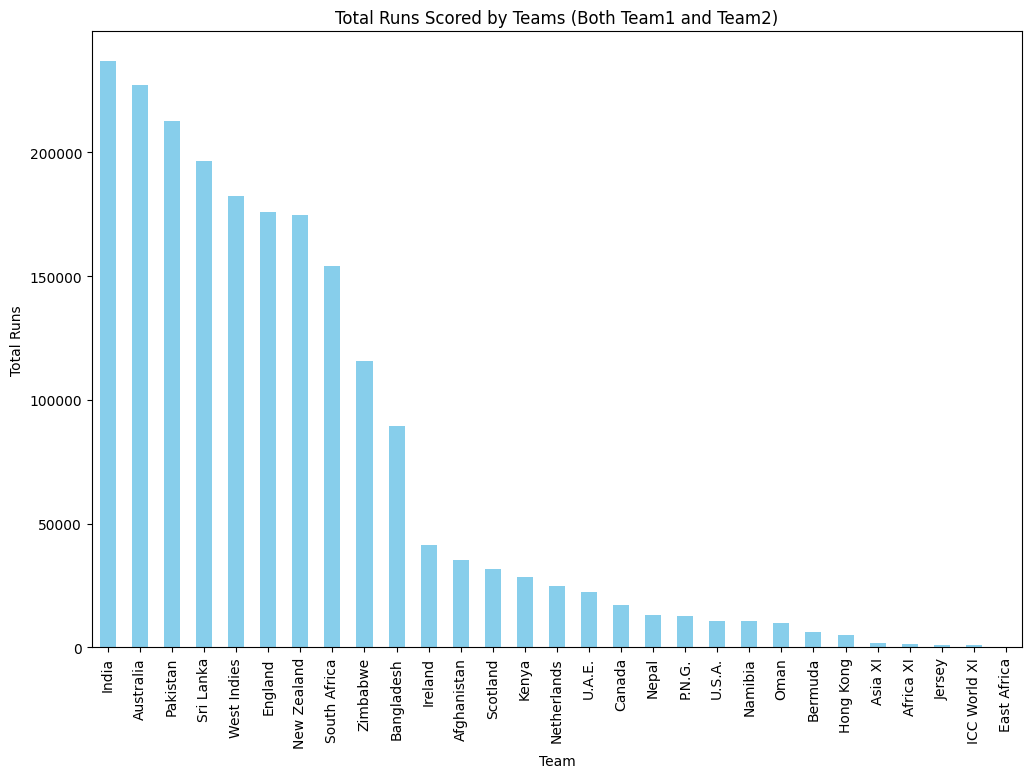

In [38]:
# Bar plot for total runs scored by teams
plt.figure(figsize=(12,8))
total_runs['Total Runs'].plot(kind='bar', color='skyblue')
plt.title('Total Runs Scored by Teams (Both Team1 and Team2)')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)
plt.show()

In [39]:
# Calculate number of wins for each team
team_wins = matches['Match Winner'].value_counts()

# Calculate number of matches played by each team
team_matches = matches['Team1 Name'].value_counts() + matches['Team2 Name'].value_counts()

# Calculate win percentage for each team
win_percentage = (team_wins / team_matches) * 100

# Sort by win percentage
win_percentage = win_percentage.sort_values(ascending=False)

# Display top 10 teams with highest win percentage
print(win_percentage.head(10))


South Africa    61.102832
Australia       60.860861
Asia XI         57.142857
India           52.985782
Pakistan        52.783505
Nepal           51.515152
England         50.188206
Namibia         50.000000
Oman            50.000000
West Indies     48.109966
Name: count, dtype: float64


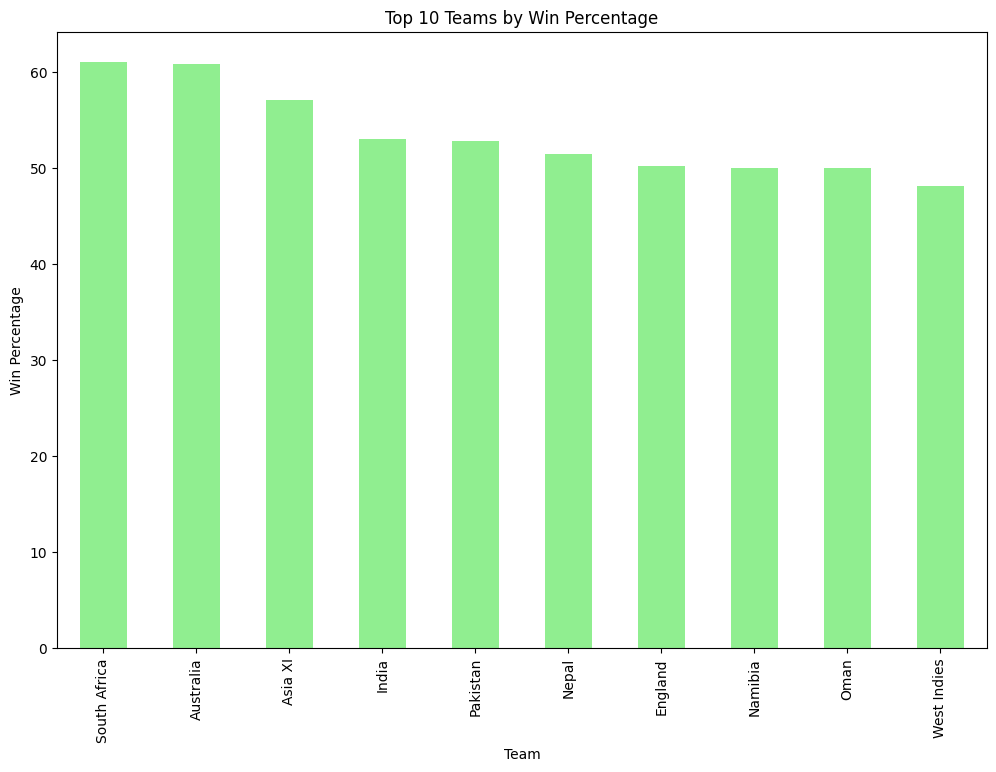

In [40]:
# Bar plot for win percentage by teams
plt.figure(figsize=(12,8))
win_percentage.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Teams by Win Percentage')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.xticks(rotation=90)
plt.show()

In [41]:
# Count the match results (win, draw, etc.)
match_results = matches['Match Result Text'].value_counts()

# Display the results
print(match_results)

Match Result Text
No result                                                              161
Match tied                                                              36
Pakistan won by 11 runs                                                  8
Australia won by 18 runs                                                 8
Pakistan won by 28 runs                                                  7
                                                                      ... 
Pakistan won by 171 runs                                                 1
New Zealand won by 9 wickets (with 13 balls remaining) (D/L method)      1
Sri Lanka won by 9 wickets (with 272 balls remaining)                    1
England won by 55 runs                                                   1
Canada won by 60 runs                                                    1
Name: count, Length: 3404, dtype: int64


In [43]:
# Count the number of matches played at each venue
venue_matches = matches['Match Venue (Stadium)'].value_counts()

# Display top 10 venues with the most matches
print(venue_matches.head(10))

Match Venue (Stadium)
Sharjah Cricket Association Stadium             201
Harare Sports Club                              181
Sydney Cricket Ground                           161
Melbourne Cricket Ground                        151
R Premadasa Stadium                             137
Shere Bangla National Stadium                   120
Queens Sports Club                               90
Adelaide Oval                                    86
Western Australia Cricket Association Ground     80
Eden Park                                        79
Name: count, dtype: int64


In [44]:
# Convert 'Match Date' to datetime format
matches['Match Date'] = pd.to_datetime(matches['Match Date'], errors='coerce')

# Extract year from 'Match Date'
matches['Year'] = matches['Match Date'].dt.year

# Count the number of matches played each year
matches_per_year = matches.groupby('Year')['Match ID'].count()

# Display match trends over the years
print(matches_per_year)

Year
1971.0      1
1972.0      3
1973.0      5
1974.0      6
1975.0     19
1976.0      6
1977.0      6
1978.0     10
1979.0     26
1980.0     21
1981.0     28
1982.0     33
1983.0     66
1984.0     51
1985.0     65
1986.0     62
1987.0     74
1988.0     61
1989.0     55
1990.0     61
1991.0     39
1992.0     89
1993.0     82
1994.0     98
1995.0     60
1996.0    127
1997.0    115
1998.0    108
1999.0    154
2000.0    131
2001.0    120
2002.0    145
2003.0    147
2004.0    128
2005.0    107
2006.0    160
2007.0    191
2008.0    126
2009.0    150
2010.0    142
2011.0    146
2012.0     90
2013.0    136
2014.0    120
2015.0    146
2016.0     99
2017.0    129
2018.0    128
2019.0    150
2020.0     44
2021.0     71
2022.0    161
2023.0    218
2024.0     28
Name: Match ID, dtype: int64


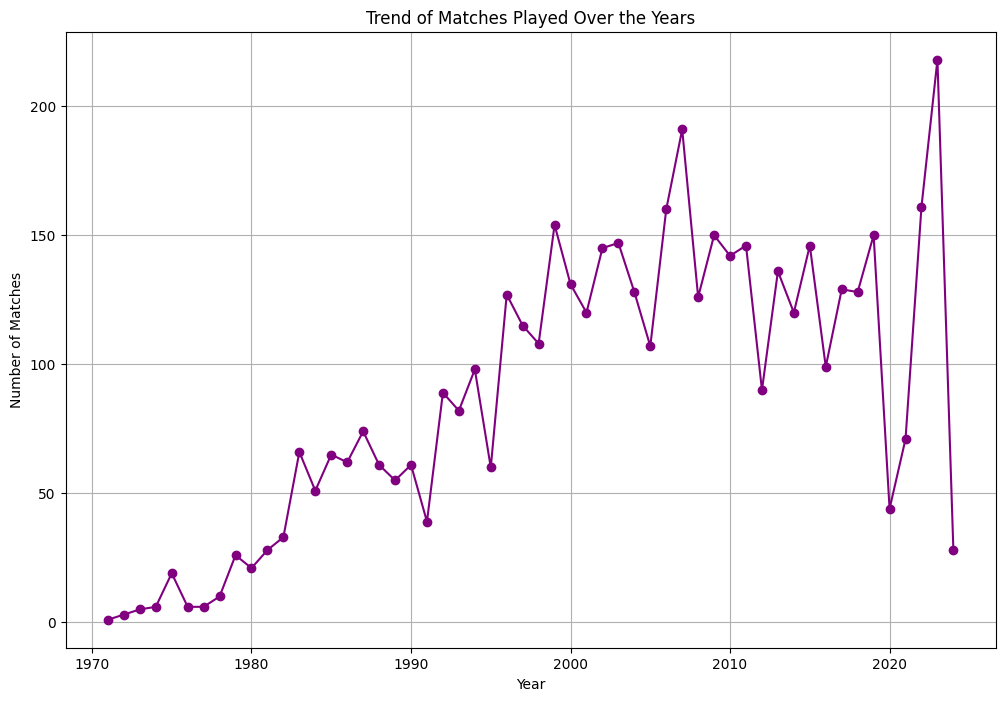

In [45]:
# Line plot for matches played per year
plt.figure(figsize=(12,8))
matches_per_year.plot(kind='line', marker='o', color='purple')
plt.title('Trend of Matches Played Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()

In [36]:
matches.to_csv('/content/drive/MyDrive/Cricket_Project/cleaned_odi_Matches_Data.csv', index=False)